In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the titanic survivor data, checking the local cache first using cache=True
df = sns.load_dataset('titanic', cache = True)

In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.shape(

SyntaxError: incomplete input (550844918.py, line 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [9]:
df['age'].value_counts(dropna = False)

age
NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 89, dtype: int64

In [10]:
df['deck'].value_counts(dropna = True)

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [12]:
# finding missing data
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df.notnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
887,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
888,True,True,True,False,True,True,True,True,True,True,True,False,True,True,True
889,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [14]:
# return the sum of NaN values for each column
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## delete missing data

### replacing with the mean value

In [17]:
# delete columns of deck

# thresh = 500 means to delete all columns that have 500 or more NaN values
new_df = df.dropna(axis = 1, thresh = 500)
new_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [18]:
# delete rows of missing age
age_df = df.dropna(axis=0, how='any', subset=['age'])
len(age_df)

714

In [19]:
# dropna() without parameter will delete any element that is NaN
no = df.dropna()
no.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [22]:
len(no)

182

In [23]:
no = df.dropna(axis = 0, how = 'any')
len(no)

182

## replacing missing data with other data

In [35]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic', cache = True)
print(df['age'].head(10))

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64


In [36]:
# calculate the mean value
avg_age = df['age'].mean(axis = 0)
avg_age

29.69911764705882

In [37]:
# calculate the mean value
median_age = df['age'].median(axis=0)
median_age

28.0

In [38]:
# fill the na values
df['age'].fillna(avg_age, inplace=True)
df['age'].head(10)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64

In [39]:
# check if replaced
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### replacing with the most frequent value

In [40]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic', cache=True) # load the titanic dataset

In [74]:
# value_counts method returns a series that shows the count of unique occurences of each row in the column. it excludes missing data
town_count = df['embark_town'].value_counts(dropna=True)
town_count

embark_town
Southampton    645
Cherbourg      169
Queenstown      77
Name: count, dtype: int64

In [42]:
type(town_count)

pandas.core.series.Series

In [44]:
# return the index where the maximum value first occurs in the requested axis
most = town_count.idxmax()
most 

'Southampton'

In [46]:
df['embark_town'].fillna(most, inplace=True)
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

### replacing with neighboring values

In [48]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic', cache=True)
null_indexes = df[df['embark_town'].isna()].index
null_indexes

Index([61, 829], dtype='int64')

In [49]:
df[60:63]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
60,0,3,male,22.0,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
61,1,1,female,38.0,0,0,80.0000,NaN,First,woman,False,B,NaN,yes,True
62,0,1,male,45.0,1,0,83.4750,S,First,man,True,C,Southampton,no,False


In [50]:
df['embark_town'].fillna(method = 'ffill', inplace = True)
df[60:63]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
60,0,3,male,22.0,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
61,1,1,female,38.0,0,0,80.0000,NaN,First,woman,False,B,Cherbourg,yes,True
62,0,1,male,45.0,1,0,83.4750,S,First,man,True,C,Southampton,no,False


In [51]:
df = sns.load_dataset('titanic', cache = True)
df['embark_town'].fillna(method = 'bfill', inplace = True)
df[60:63]


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
60,0,3,male,22.0,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
61,1,1,female,38.0,0,0,80.0000,NaN,First,woman,False,B,Southampton,yes,True
62,0,1,male,45.0,1,0,83.4750,S,First,man,True,C,Southampton,no,False


In [84]:
s1 = [1, 2, 6]
s2 = [None, 3, 4]
s3 = [2,5,None]
data = {"A": s1, "B": s2, "C": s3}
df = pd.DataFrame(data)
df


,A,B,C
0,1,NaN,2.0
1,2,3.0,5.0
2,6,4.0,NaN


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       3 non-null      int64  
 1   B       2 non-null      float64
 2   C       2 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 204.0 bytes


In [97]:
df.dropna(axis = 0)

,A,B,C
1,2,3.0,5.0


# lets code - mission

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

student_performance = pd.read_csv('./student/student-mat.csv', sep=';')
student_performance.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
student_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [10]:
student_performance.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
student_performance.isnull().sum().sum()

0

In [6]:
student_performance.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


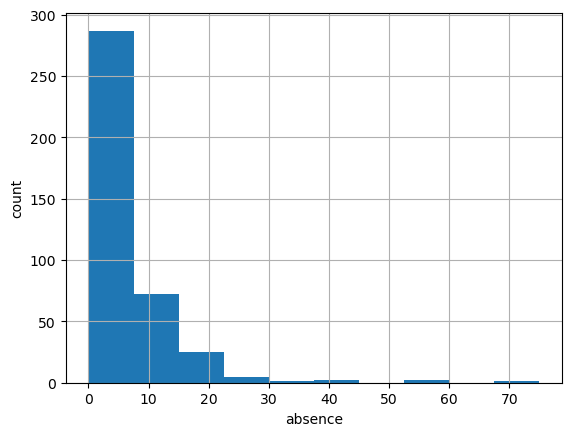

In [40]:
# histogram
plt.hist(student_performance['absences'])

plt.xlabel('absence')
plt.ylabel('count')

plt.grid(True)

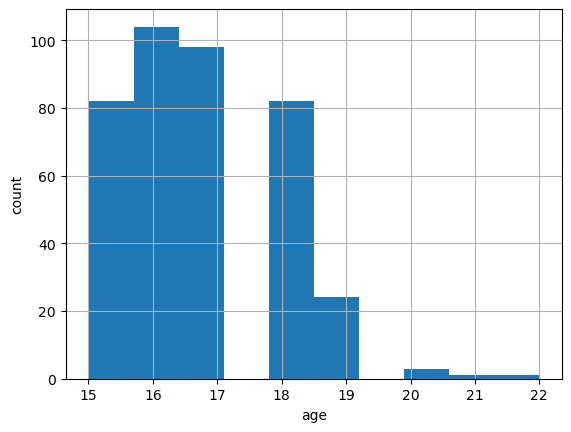

In [41]:
plt.hist(student_performance['age'])

plt.xlabel('age')
plt.ylabel('count')

plt.grid(True)

In [19]:
print(f'\n The median of studytime is: {student_performance["studytime"].median()}')
print(f'\n The mode of studytime is: {student_performance["studytime"].mode()}')
print(f'\n The variance of studytime is: {student_performance["studytime"].var()}')
print(f'\n The standard deviation of studytime is: {student_performance["studytime"].std()}')


 The median of studytime is: 2.0

 The mode of studytime is: 0    2
Name: studytime, dtype: int64

 The variance of studytime is: 0.704324359056738

 The standard deviation of studytime is: 0.839240346418556


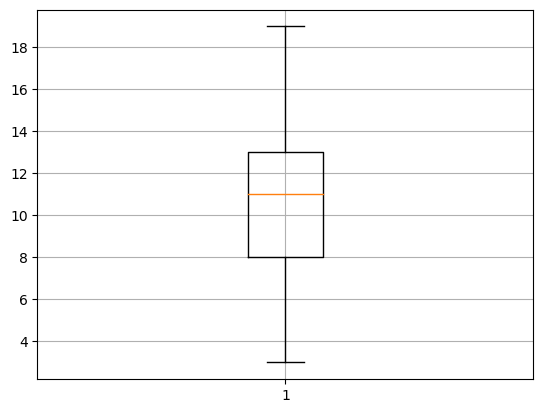

In [42]:
# box plot
plt.boxplot(student_performance['G1'])
plt.grid(True)

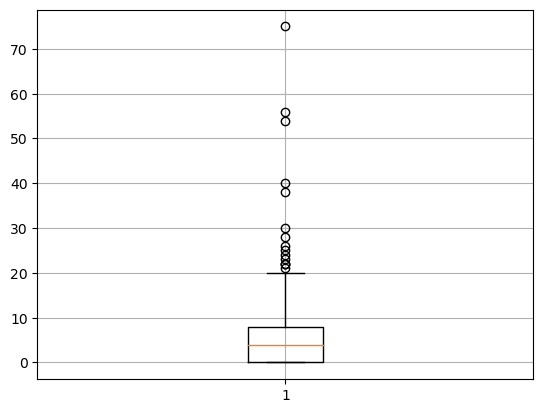

In [43]:
plt.boxplot(student_performance['absences'])
plt.grid(True)

# from the graph, the box plot for absences has many outliers

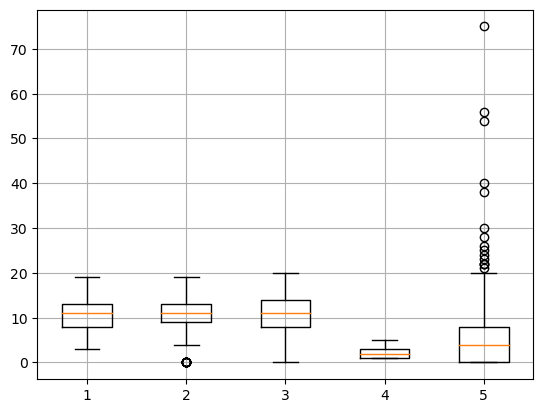

In [48]:
plt.boxplot([student_performance['G1'], student_performance['G2'], student_performance['G3'], student_performance['Walc'], student_performance['absences']])
plt.grid(True)

In [50]:
# coefficient of variation
study_time_cv = student_performance['studytime'].std() / student_performance['studytime'].mean()
print(study_time_cv)

absences_cv = student_performance['absences'].std() / student_performance['absences'].mean()
print(absences_cv)

cv = student_performance.std(numeric_only = True) / student_performance.mean(numeric_only = True)
cv

0.412313354272798
1.401872636987907


age           0.076427
Medu          0.398177
Fedu          0.431565
traveltime    0.481668
studytime     0.412313
failures      2.225319
famrel        0.227330
freetime      0.308725
goout         0.358098
Dalc          0.601441
Walc          0.562121
health        0.391147
absences      1.401873
G1            0.304266
G2            0.351086
G3            0.439881
dtype: float64

In [51]:
# covariance
student_performance.cov(min_periods = None, ddof = 1, numeric_only = True)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.628285,-0.228619,-0.226949,0.062873,-0.004434,0.231221,0.061717,0.020947,0.180364,0.149039,0.192733,-0.110326,1.789501,-0.271413,-0.688653,-0.944612
Medu,-0.228619,1.198445,0.742717,-0.131061,0.059667,-0.192681,-0.003842,0.033779,0.078115,0.019341,-0.066440,-0.071349,0.878622,0.746135,0.887509,1.089096
Fedu,-0.226949,0.742717,1.184180,-0.120073,-0.008379,-0.202641,-0.001337,-0.013963,0.052220,0.002313,-0.017702,0.022303,0.213134,0.687245,0.674953,0.760078
traveltime,0.062873,-0.131061,-0.120073,0.486513,-0.059070,0.047844,-0.010512,-0.011861,0.022162,0.085941,0.120478,0.007274,-0.072255,-0.215402,-0.401940,-0.374337
studytime,-0.004434,0.059667,-0.008379,-0.059070,0.704324,-0.108321,0.029898,-0.120041,-0.059706,-0.146533,-0.274304,-0.088228,-0.421127,0.447401,0.428947,0.376110
failures,0.231221,-0.192681,-0.202641,0.047844,-0.108321,0.553017,-0.029564,0.068329,0.103123,0.090118,0.135964,0.068059,0.379265,-0.875557,-0.995528,-1.227932
famrel,0.061717,-0.003842,-0.001337,-0.010512,0.029898,-0.029564,0.803997,0.134974,0.064454,-0.061974,-0.130952,0.117252,-0.318287,0.065977,-0.061659,0.211000
freetime,0.020947,0.033779,-0.013963,-0.011861,-0.120041,0.068329,0.134974,0.997725,0.316944,0.185954,0.190163,0.105173,-0.464274,0.041817,-0.051764,0.051745
goout,0.180364,0.078115,0.052220,0.022162,-0.059706,0.103123,0.064454,0.316944,1.239388,0.264763,0.602744,-0.014824,0.394718,-0.550967,-0.679438,-0.677292
Dalc,0.149039,0.019341,0.002313,0.085941,-0.146533,0.090118,-0.061974,0.185954,0.264763,0.793420,0.742852,0.095579,0.797758,-0.278385,-0.214836,-0.223061


In [54]:
# covariance using numpy
np.cov(student_performance['G1'], student_performance['G3'])

array([[11.01705327, 12.18768232],
       [12.18768232, 20.9896164 ]])

In [55]:
print(student_performance['G1'].var())
print(student_performance['G3'].var())

11.017053267364899
20.989616397866737


In [56]:
# correlation coefficient
student_performance.corr(numeric_only = True)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


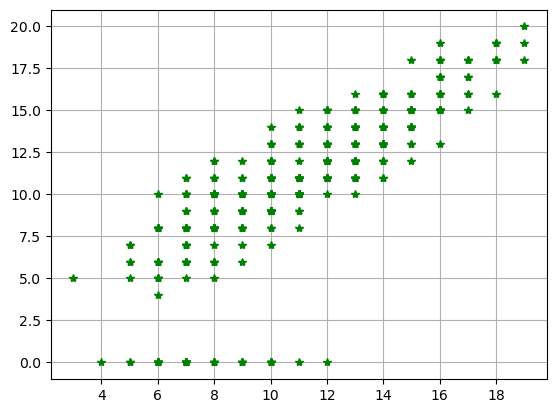

In [74]:
plt.plot(student_performance['G1'], student_performance['G3'], 'g*')
plt.grid(True)

# comparison between the first exam and the final grade in a single graph
# show that individuals who perform well from the beginning tend to perform well until the end

/Users/anbschool0032/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


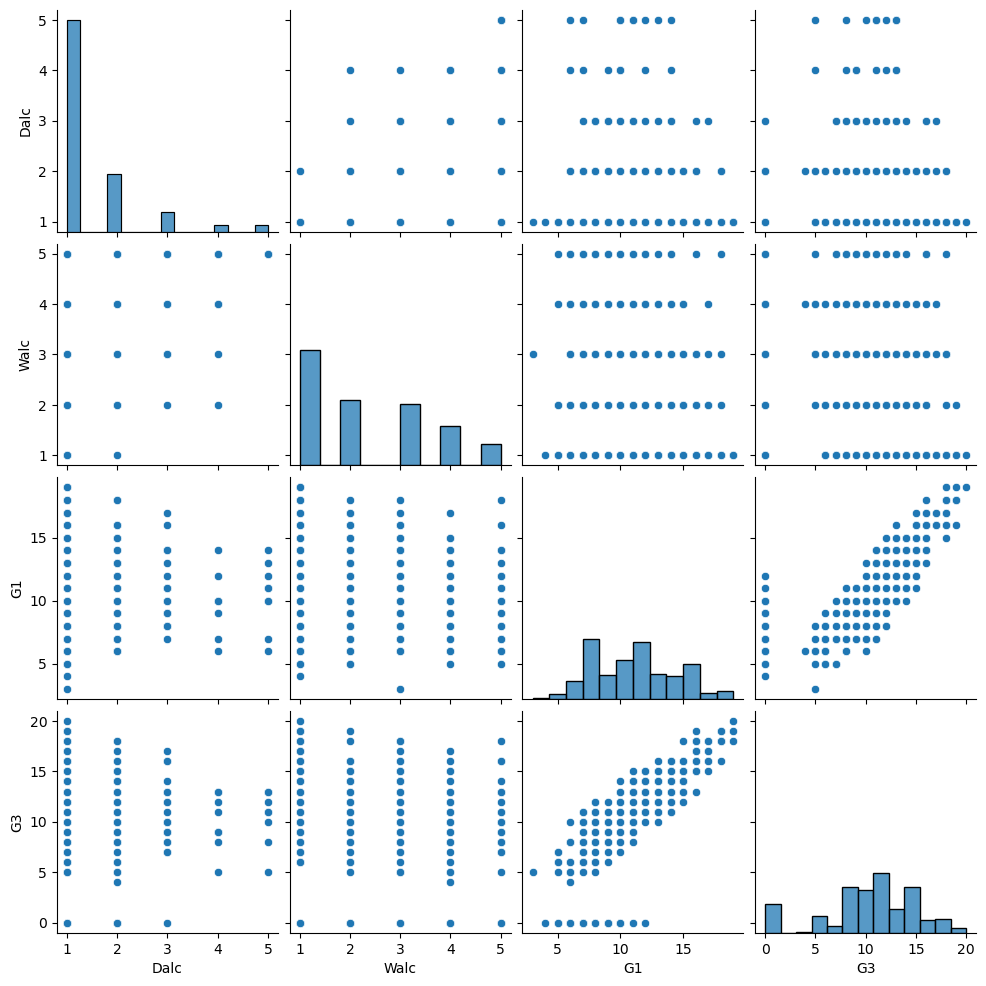

In [72]:
sns.pairplot(student_performance[['Dalc', 'Walc', 'G1', 'G3']])
plt.grid(True)